# HK Model (unmodified)

## $d=1$

### 1. Density

In [2]:
from HKLnumerics import HK_1D, PlotFunctions

In [9]:
mu_U1 = HK_1D.create_mu_array(5000, 2)
mu_U8 = HK_1D.create_mu_array(5000, 8)

rho_U1 = HK_1D.create_rho_array(mu_U1, 2)
rho_U8 = HK_1D.create_rho_array(mu_U8, 8)

mus = [mu_U1, mu_U8]
rhos = [rho_U1, rho_U8]
labels = [r'(a) $U=W/2$', r'(b) $U=2W$']

Progress: 100.0%                    

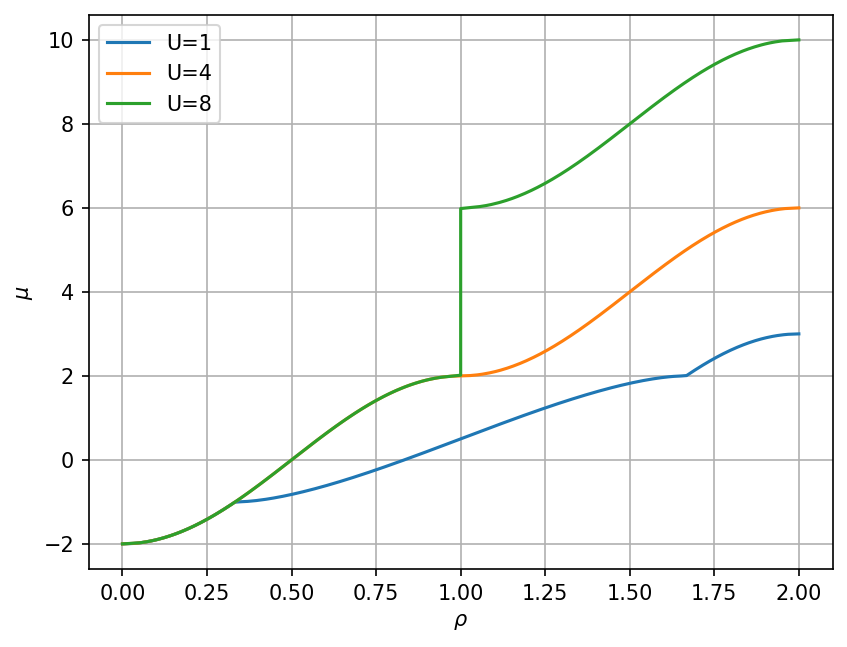

In [5]:
PlotFunctions.many_plots(labels, rhos, mus, r'$\rho$', r'$\mu$')

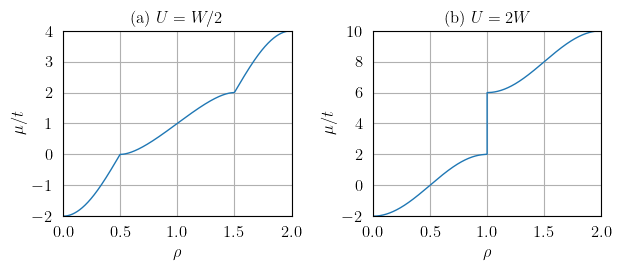

In [12]:
import importlib
importlib.reload(PlotFunctions)

PlotFunctions.thesis_doubleplot_one_line(rhos, mus, r'$\rho$', r'$\mu / t$', labels, yticks=[1, 2], save_title='Plots/HK_mu_rho_weak_strong.pdf')
#PlotFunctions.thesis_doubleplot_one_line(rhos, mus, r'$\rho$', r'$\mu$', labels, yticks=[1, 2])

Maybe continue with more values for density, plot them a t same time?

#### 3d-Plot

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
U_vals = np.linspace(0, 8, N)

# build mu_grid: row i contains mu values for U = U_vals[i]
mu_grid = np.empty((N, N))
for i, U in enumerate(U_vals):
    mu_grid[i, :] = np.linspace(-2, 2 + U, N)

# build rho_grid: each row is the rho array computed for that row's mu and U
rho_grid = np.empty_like(mu_grid)
for i, U in enumerate(U_vals):
    rho_grid[i, :] = HK_1D.create_rho_array(mu_grid[i, :], U)   # shape (N,)

rho_grid_Uc = np.empty_like(rho_grid)
for i, U in enumerate(U_vals):
    for j in range(N):
        if U < 4 * np.square(np.sin(np.pi * rho_grid[i, j] / 2)):
            rho_grid_Uc[i, j] = rho_grid[i, j]
        else:
            rho_grid_Uc[i, j] = np.nan
    

# build U_grid as a 2D array where each row is the constant U value
U_grid = np.repeat(U_vals[:, None], N, axis=1)   # shape (N, N)

# (Optional) mask invalid values if create_rho_array may produce NaNs
rho_grid = np.ma.masked_invalid(rho_grid)



Progress: 99.0%                    

In [4]:
rho_grid_Uc = np.empty_like(rho_grid)
for i, U in enumerate(U_vals):
    for j in range(N):
        if U <= 4 * np.square(np.sin(np.pi * rho_grid[i, j] / 2)):
            rho_grid_Uc[i, j] = rho_grid[i, j]
        else:
            rho_grid_Uc[i, j] = np.nan

In [5]:
mask2 = (rho_grid > 1) | ~(np.isnan(rho_grid_Uc)) | (mu_grid >= 2.1)
mask3 = (rho_grid < 1) | ~(np.isnan(rho_grid_Uc)) | (rho_grid == 1 & (mu_grid < U_grid-2.1))
mask4 = (rho_grid != 1) | ~(np.isnan(rho_grid_Uc))
mask1 = ~(mask2 & mask3 & mask4)

mumask2 = (mu_grid > 2)


In [6]:
for i, U in enumerate(U_vals):
    if i < N-1:
        for j in range(N-1):
            if U <= 4 * np.square(np.sin(np.pi * rho_grid[i, j] / 2)):
                if rho_grid[i, j] < 1:
                    rho_grid_Uc[i+1, j-1] = rho_grid[i+1, j-1]
                else:
                    rho_grid_Uc[i+1, j+1] = rho_grid[i+1, j+1]
            else:
                if rho_grid[i, j] < 1:
                    rho_grid_Uc[i+1, j-1] = np.nan
                else:
                    rho_grid_Uc[i+1, j+1] = np.nan

In [88]:
for i, U in enumerate(U_vals):
    if i < N-1:
        for j in range(N):
            if U <= 4 * np.square(np.sin(np.pi * rho_grid[i, j] / 2)):
                rho_grid_Uc[i+1, j] = rho_grid[i+1, j]
            else:
                rho_grid_Uc[i+1, j] = np.nan

In [252]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.6.3


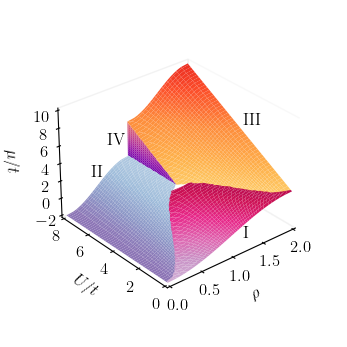

In [7]:
import matplotlib.colors as mcolors

textwidth = 6.377953

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern",
    "font.size": 12,
    "axes.titlesize": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})

def truncate_colormap(cmap_name, minval=0.2, maxval=1.0, n=256):
    cmap = plt.get_cmap(cmap_name)
    new_colors = cmap(np.linspace(minval, maxval, n))
    return mcolors.LinearSegmentedColormap.from_list(f"trunc({cmap_name},{minval:.2f},{maxval:.2f})", new_colors)

"""
# --- Plot ---
fig = plt.figure(figsize=(textwidth, textwidth/2))
#fig.set_size_inches(6.377953 / 1.5, 2.73341 * 1.2)
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect(None, zoom=0.8)
"""
fig, ax = plt.subplots(figsize=(textwidth/1.5,textwidth/1.5), subplot_kw={"projection": "3d"})

ax.set_box_aspect(None, zoom=0.8)

ax.plot_surface(
    rho_grid_Uc,
    U_grid,
    mu_grid,
    edgecolor='none', shade=True, antialiased=True,
    cmap=truncate_colormap('PuRd', 0.3, 0.8)
)

ax.plot_surface(
    np.ma.array(rho_grid, mask=mask2),
    np.ma.array(U_grid, mask=mask2),
    np.ma.array(mu_grid, mask=mask2),
    edgecolor='none', linewidth=1, shade=False,
    cmap=truncate_colormap('BuPu_r', 0.4, 0.7)
)

ax.plot_surface(
    np.ma.array(rho_grid, mask=mask3),
    np.ma.array(U_grid, mask=mask3),
    np.ma.array(mu_grid, mask=mask3),
    edgecolor='none', shade=True, antialiased=True,
    cmap=truncate_colormap('YlOrRd', 0.3, 0.7)
)

ax.plot_surface(
    np.ma.array(rho_grid, mask=mask4),
    np.ma.array(U_grid, mask=mask4),
    np.ma.array(mu_grid, mask=mask4),
    edgecolor='none', shade=True,
    cmap=truncate_colormap('plasma', 0.2, 0.6)
)


ax.set_zlim(-2, 10)
ax.set_xlim(0, 2)
ax.set_ylim(0, 8)
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$U / t$')
ax.set_zlabel(r'$\mu /t$', rotation=0.5)

ax.tick_params(pad=0)

# Remove the panes (background faces)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.text(1.25, 0, -1, 'I', ha='center')
ax.text(0.5, 8, 1, 'II', ha='center')
ax.text(2, 3, 7, 'III', ha='center')
ax.text(0.95, 8, 4, 'IV', ha='right', va='center')

# Remove the grid lines
ax.grid(False)

ax.view_init(elev=30, azim=230)   # adjust viewing angle as desired

#plt.savefig('Plots/3d-plot.pdf', dpi=1000, bbox_inches="tight")
plt.show()

### 2. Compressibility

In [10]:
kappa_U1 = HK_1D.create_kappa_array(mu_U1, 2)

kappa_U8 = HK_1D.create_kappa_array(mu_U8, 8)

kappas = [kappa_U1, kappa_U8]

Progress: 100.0%                    

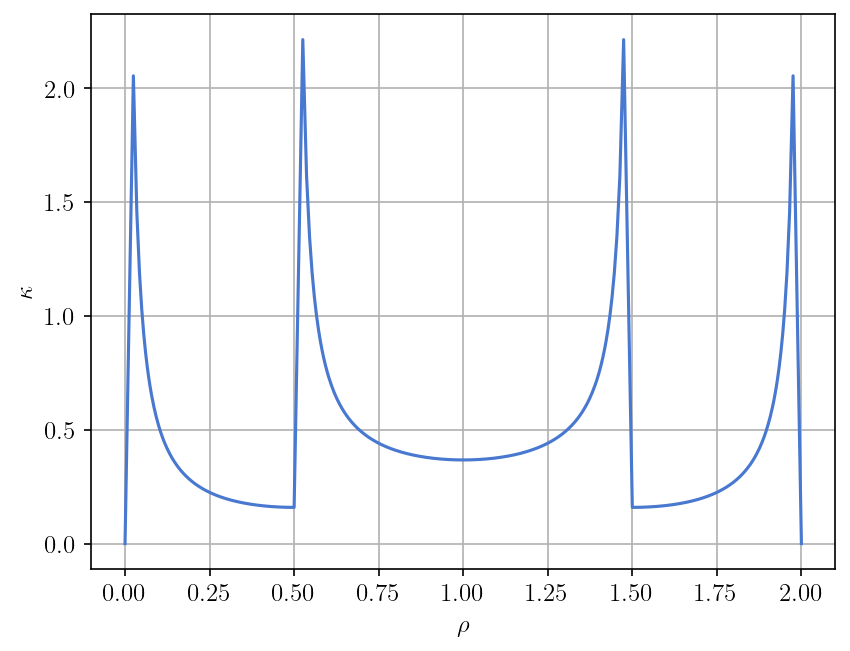

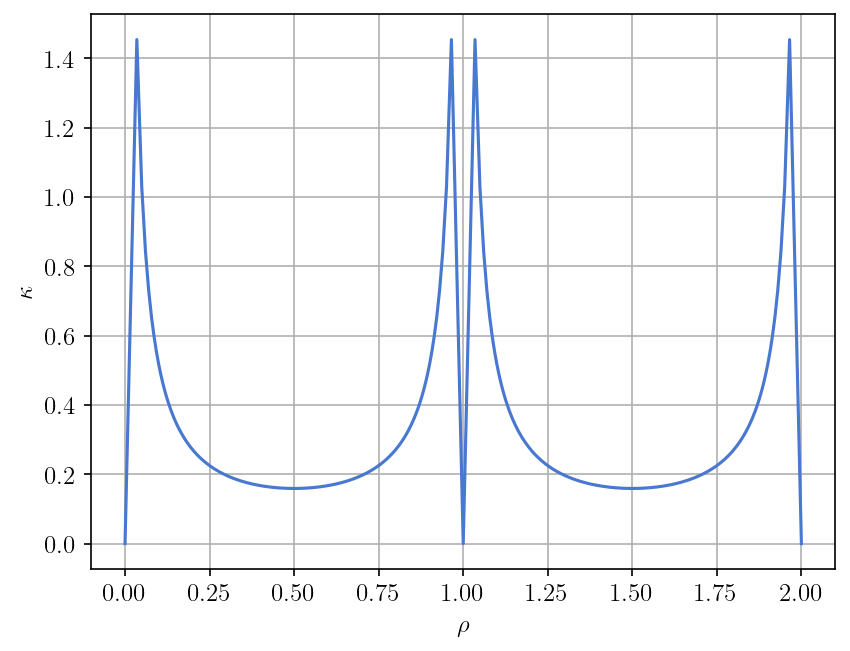

In [298]:
PlotFunctions.one_plot(rho_U1, kappa_U1, r'$\rho$', r'$\kappa$')
PlotFunctions.one_plot(rho_U8, kappa_U8, r'$\rho$', r'$\kappa$')

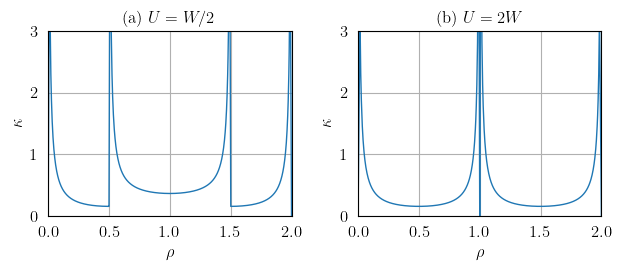

In [13]:
importlib.reload(PlotFunctions)

PlotFunctions.thesis_doubleplot_one_line(rhos, kappas, r'$\rho$', r'$\kappa$', labels, yticks=[1,1], ymax=3, save_title='Plots/HK_kappa_weak_strong.pdf')

### 3. Energy

In [ ]:
energy_U2 = HK_1D.create_energy_array(mu_U1, 2)
energy_U8 = HK_1D.create_energy_array(mu_U8, 8)

energies = [energy_U2, energy_U8]

print(np.min(energy_U2))

Progress: 99.9%                    -0.6366197723675814


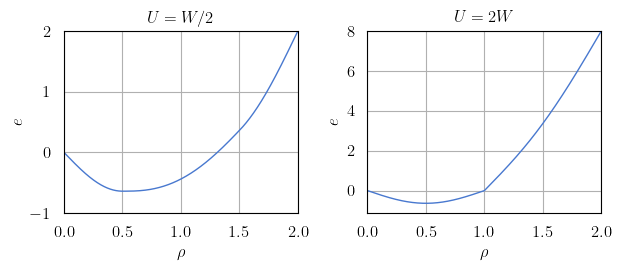

In [120]:
importlib.reload(PlotFunctions)

PlotFunctions.thesis_doubleplot_one_line(rhos, energies, r'$\rho$', r'$e$', labels, yticks=[1, 2], ylimits=[(1-0.6366197723675814), 0.5], save_title='Plots/energies_weak_strong.pdf')

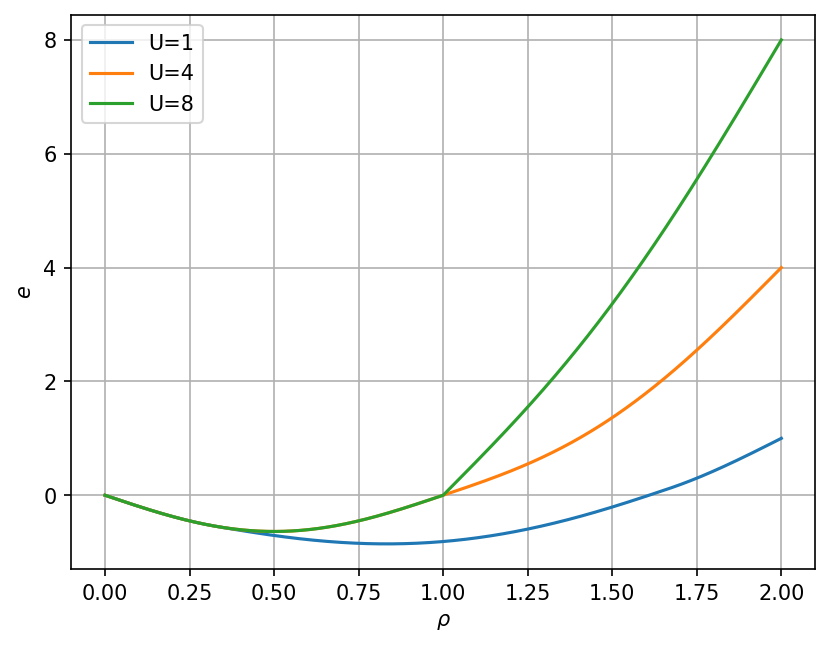

In [18]:
PlotFunctions.many_plots(labels, rhos, energies, r'$\rho$', r'$e$')

## Phase Diagram

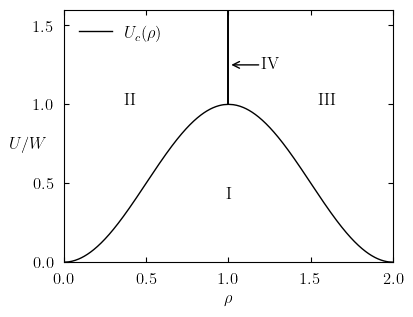

In [156]:
from HKLnumerics import PhaseDiagram_1D
import numpy as np
importlib.reload(PhaseDiagram_1D)
importlib.reload(PlotFunctions)

rho_arr, Uc_arr = PhaseDiagram_1D.phase_diagram_hk(500)

Uc_arr_norm = Uc_arr / np.max(Uc_arr)

PlotFunctions.thesis_plot_pd(rho_arr, Uc_arr_norm, 'Plots/Phase_diagram_HK_1d.pdf')

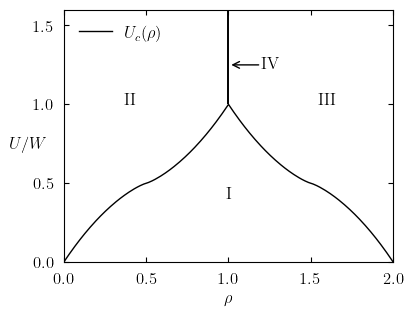

In [ ]:
from HKLnumerics import PhaseDiagram_2D
importlib.reload(PhaseDiagram_2D)

rho_arr_2d, Uc_arr_2d = PhaseDiagram_2D.phase_diagram_hk(500)

Uc_arr_norm_2d = Uc_arr_2d / np.max(Uc_arr_2d)

PlotFunctions.thesis_plot_pd(rho_arr_2d, Uc_arr_norm_2d)

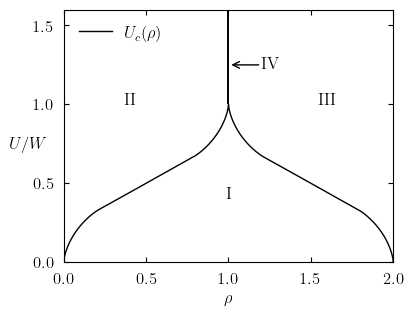

In [163]:
from HKLnumerics import PhaseDiagram_3D
importlib.reload(PhaseDiagram_3D)

rho_arr_3d, Uc_arr_3d = PhaseDiagram_3D.phase_diagram_hk(500)

Uc_arr_norm_3d = Uc_arr_3d / np.max(Uc_arr_3d)

PlotFunctions.thesis_plot_pd(rho_arr_3d, Uc_arr_norm_3d)

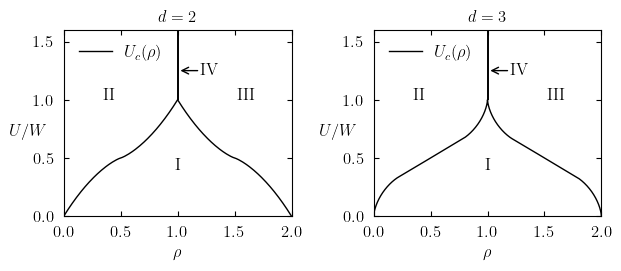

In [167]:
importlib.reload(PlotFunctions)

PlotFunctions.thesis_doubleplot_pd([rho_arr_2d, rho_arr_3d], [Uc_arr_norm_2d, Uc_arr_norm_3d], [r'$d=2$', r'$d=3$'], save_title='Plots/HK_pd_2d3d.pdf')

## $d=2$

In [21]:
from HKLnumerics import HK_2D, PlotFunctions
import numpy as np

str_rho = r'$\rho$'
str_mu = r'$\mu$'

N = 1000

In [22]:
U_list_2d = [2, 4, 8, 12]
labels_2d = [r'$W/4$', r'$W/2$', r'$W$', r'$3W/2$']
mu_list_2d = [HK_2D.create_mu_array(N, U_i) for U_i in U_list_2d]
rho_list_2d = [HK_2D.create_rho_array(mu_list_2d[i], U_list_2d[i]) for i in range(4)]

Progress: 99.9%                    

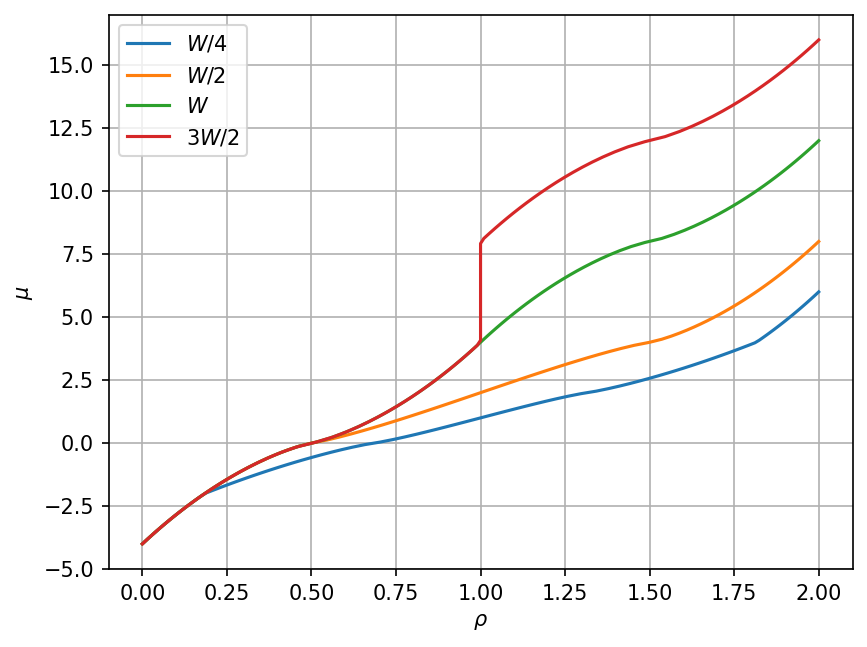

In [47]:
PlotFunctions.many_plots(labels_2d, rho_list_2d, mu_list_2d, str_rho, str_mu)

In [56]:
U_energies_2d = [4, 16]
mu_list_energies_2d = [HK_2D.create_mu_array(500, U_i) for U_i in U_energies_2d]
rho_list_energies_2d = [HK_2D.create_rho_array(mu_list_energies_2d[i], U_energies_2d[i]) for i in range(2)]
labels_energies = [r'(a) $U=W/2$', r'(b) $U=2W$']
#energies_2d = [HK_2D.create_energy_array(mu_list_energies_2d[i], U_energies_2d[i]) for i in range(2)]

Progress: 99.8%                    

### Compressibility

In [57]:
kappa_list_2d = [HK_2D.create_kappa_array(mu_list_energies_2d[i], U_energies_2d[i]) for i in range(2)]

Progress: 99.8%                    

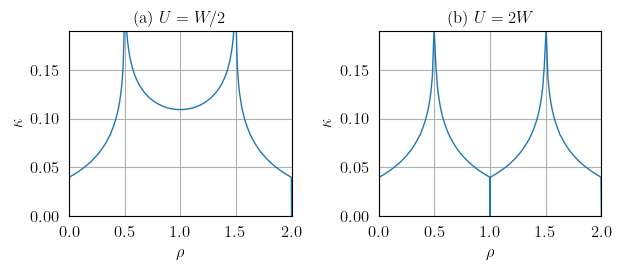

In [58]:
PlotFunctions.thesis_doubleplot_one_line(rho_list_energies_2d, kappa_list_2d, r'$\rho$', r'$\kappa$', labels_energies, ymax=0.19, yticks=[0.05, 0.05], save_title='Plots/HK-compressibility-2d.pdf')

## $d=3$

In [289]:
from HKLnumerics import HK_3D

U_list_3d = [3, 6, 12, 18]
mu_list_3d = [HK_3D.create_mu_array(N, U_i) for U_i in U_list_3d]
rho_list_3d = [HK_3D.create_rho_array(mu_list_3d[i], U_list_3d[i]) for i in range(4)]

Progress: 27.0%                    

/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Progress: 29.0%                    

/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Progress: 99.0%                    

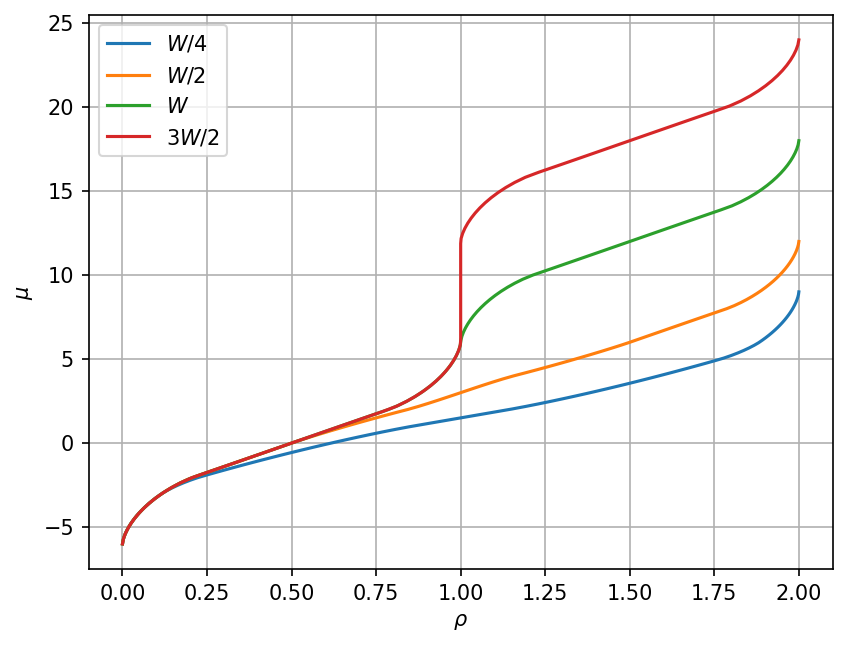

In [49]:
PlotFunctions.many_plots(labels_2d, rho_list_3d, mu_list_3d, str_rho, str_mu)

In [56]:
print(rho_list_3d)

[array([0.00000000e+00, 1.00742872e-03, 2.88294128e-03, 5.35980491e-03,
       8.35292073e-03, 1.18193942e-02, 1.57353206e-02, 2.00875835e-02,
       2.48701476e-02, 3.00821569e-02, 3.57268986e-02, 4.18112415e-02,
       4.83453717e-02, 5.53427360e-02, 6.28201591e-02, 7.07981231e-02,
       7.93012323e-02, 8.83589005e-02, 9.80063487e-02, 1.08286050e-01,
       1.19339156e-01, 1.32289761e-01, 1.46840151e-01, 1.62910698e-01,
       1.80585517e-01, 2.00077249e-01, 2.21881819e-01, 2.47485167e-01,
       2.74226751e-01, 3.01356153e-01, 3.28881508e-01, 3.56814330e-01,
       3.85169299e-01, 4.13964254e-01, 4.43220374e-01, 4.72962481e-01,
       5.03219583e-01, 5.34025612e-01, 5.65420521e-01, 5.97451837e-01,
       6.30177024e-01, 6.63667102e-01, 6.98012677e-01, 7.33334807e-01,
       7.69807466e-01, 8.07715484e-01, 8.47707968e-01, 8.91049006e-01,
       9.34637292e-01, 9.78213746e-01, 1.02178626e+00, 1.06536271e+00,
       1.10895099e+00, 1.15229203e+00, 1.19228452e+00, 1.23019254e+00,
     

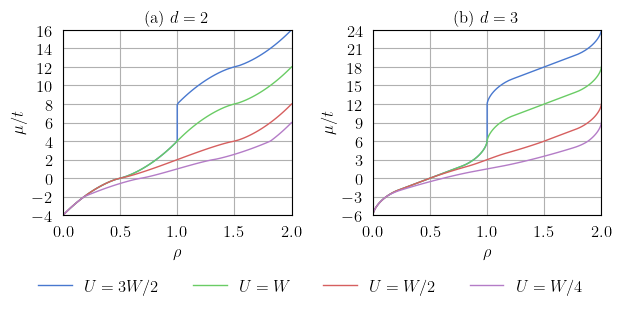

In [292]:
import importlib
importlib.reload(PlotFunctions)

plt.style.use('seaborn-v0_8-muted')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern",
    "font.size": 12,
    "axes.titlesize": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})

labels_2d = [r'$U=W/4$', r'$U=W/2$', r'$U=W$', r'$U=3W/2$']
labels_3d = [r'$U=W/4$', r'$U=W/2$', r'$U=W$', r'$U=3W/2$']

PlotFunctions.thesis_doubleplot_multiple_lines([labels_2d, labels_3d], [rho_list_2d, rho_list_3d], [mu_list_2d, mu_list_3d],
                                               str_rho, r'$\mu / t$', [r'(a) $d=2$', r'(b) $d=3$'], yticks=[2, 3], save_title='Plots/HK_mu_rho_2d3d.pdf')

In [124]:
U_energies_3d = [6, 24]
mu_list_energies_3d = [HK_3D.create_mu_array(100, U_i) for U_i in U_energies_3d]
energies_3d = [HK_3D.create_energy_array(mu_list_energies_3d[i], U_energies_3d[i]) for i in range(2)]

Progress: 23.0%                    

/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Progress: 78.0%                    

/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Progress: 99.0%                    

In [132]:
rho_list_2d_en = [rho_list_2d[1], HK_2D.create_rho_array(mu_list_energies_2d[1], U_energies_2d[1])]
rho_list_3d_en = [rho_list_3d[1], HK_3D.create_rho_array(mu_list_energies_3d[1], U_energies_3d[1])]

Progress: 11.0%                    

/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Progress: 23.0%                    

/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Progress: 99.0%                    

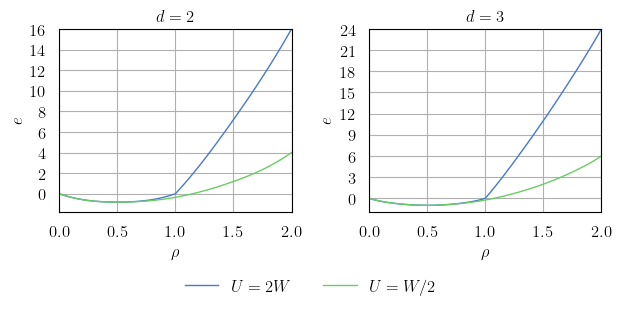

In [147]:
importlib.reload(PlotFunctions)

PlotFunctions.thesis_doubleplot_multiple_lines([labels_energies, labels_energies], [rho_list_2d_en, rho_list_3d_en], [energies_2d, energies_3d],
                                                r'$\rho$', r'$e$', titles=[r'$d=2$', r'$d=3$'], yticks=[2, 3], ylimits=[1, 1], save_title='Plots/HK_energies_2d3d.pdf')

In [48]:
from HKLnumerics import HK_3D

U_kappas_3d = [6, 24]
mu_list_kappas_3d = [HK_3D.create_mu_array(100, U_i) for U_i in U_kappas_3d]
rho_list_kappas_3d = [HK_3D.create_rho_array(mu_list_kappas_3d[i], U_kappas_3d[i]) for i in range(2)]
kappas_3d = [HK_3D.create_kappa_array(mu_list_kappas_3d[i], U_kappas_3d[i]) for i in range(2)]

Progress: 22.0%                    

/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Progress: 44.0%                    

/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Progress: 17.0%                    

/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Progress: 99.0%                    

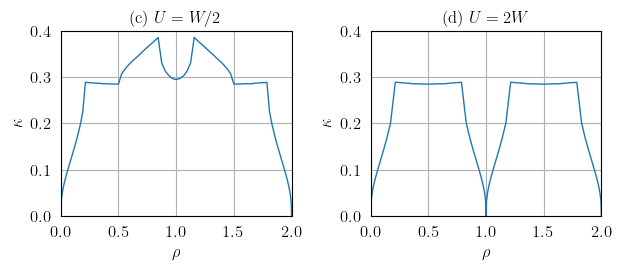

In [52]:
PlotFunctions.thesis_doubleplot_one_line(rho_list_kappas_3d, kappas_3d, r'$\rho$', r'$\kappa$', [r'(c) $U=W/2$', r'(d) $U=2W$'], ymax=0.4, yticks=[0.1, 0.1], save_title='Plots/HK-compressibility-3d.pdf')

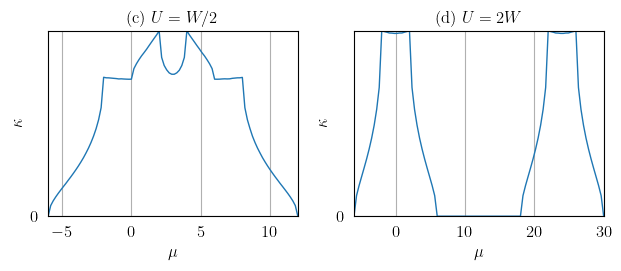

In [67]:
PlotFunctions.thesis_doubleplot_one_line(mu_list_kappas_3d, kappas_3d, r'$\mu$', r'$\kappa$', [r'(c) $U=W/2$', r'(d) $U=2W$'])

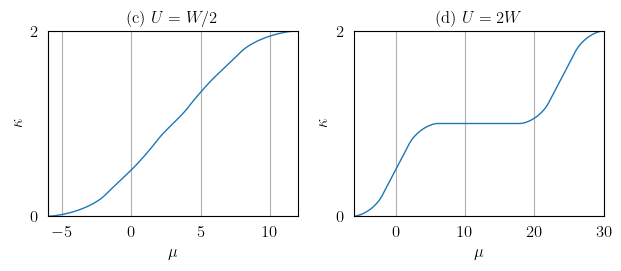

In [68]:
PlotFunctions.thesis_doubleplot_one_line(mu_list_kappas_3d, rho_list_kappas_3d, r'$\mu$', r'$\kappa$', [r'(c) $U=W/2$', r'(d) $U=2W$'])